In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def load_dataframes(prefix, n_run, n=None):
#     prefix = "msg_QNN_Jan25_1710"
#     n_run = 12
    if n is None:
        n = n_run
    files = [prefix + "_{}.log".format(i) for i in range(n)]
    file_list = ['./log/index/'+ prefix +'_x{}/'.format(n_run) +'index_'+file+'.csv' for file in files]
    df_list = [None]*n
    for i in range(n):
        t = time.time()
        df = pd.read_csv(file_list[i], delimiter=';', index_col=0)
        df.loc[:, 'start_ts'] = df['start_ts'].apply(lambda x: pd.to_datetime(x))
        df.set_index('start_ts', inplace=True)
        df['total_reward'] = df['tr_reward'] + df['op_cost']
        df_list[i] = df
        print df.shape,
        print files[i],
        print "{:.2f} sec".format(time.time()-t)
    return df_list    

In [3]:
def get_step_reward(file_prefix, num_total, num_load):
    # df_list = load_dataframes("msg_DynaQNN_Jan30_2313", 14, 14)
    df_list = load_dataframes(file_prefix, num_total, num_load)
    df_list = filter(lambda x: x.shape[0]==302400, df_list)
    start = pd.to_datetime("2014-10-16 9:30:00")
    end = pd.to_datetime("2014-10-21 9:30:00")
    delta = pd.Timedelta('2 seconds')

    step_reward = np.zeros(len(df_list))
    for i, df in enumerate(df_list):
        df = df.loc[start:end]
        print (i, df.shape[0])
        step = (df.index-df.index[0])/delta+1
        ts = df['total_reward'].cumsum()/step
        step_reward[i] = ts.iloc[-1]
    return step_reward

---

In [11]:
step_reward = get_step_reward("msg_QNN_Jan31_2249_LSTM", 14, 14)

(302400, 41) msg_QNN_Jan31_2249_LSTM_0.log 10.54 sec
(302400, 41) msg_QNN_Jan31_2249_LSTM_1.log 10.14 sec
(302400, 41) msg_QNN_Jan31_2249_LSTM_2.log 10.05 sec
(302400, 41) msg_QNN_Jan31_2249_LSTM_3.log 10.06 sec
(302400, 41) msg_QNN_Jan31_2249_LSTM_4.log 10.08 sec
(302400, 41) msg_QNN_Jan31_2249_LSTM_5.log 10.03 sec
(302400, 41) msg_QNN_Jan31_2249_LSTM_6.log 9.94 sec
(302400, 41) msg_QNN_Jan31_2249_LSTM_7.log 10.03 sec
(302400, 41) msg_QNN_Jan31_2249_LSTM_8.log 10.05 sec
(302400, 41) msg_QNN_Jan31_2249_LSTM_9.log 10.09 sec
(302400, 41) msg_QNN_Jan31_2249_LSTM_10.log 10.02 sec
(302400, 41) msg_QNN_Jan31_2249_LSTM_11.log 10.05 sec
(302400, 41) msg_QNN_Jan31_2249_LSTM_12.log 10.06 sec
(302400, 41) msg_QNN_Jan31_2249_LSTM_13.log 10.08 sec
(0, 216001)
(1, 216001)
(2, 216001)
(3, 216001)
(4, 216001)
(5, 216001)
(6, 216001)
(7, 216001)
(8, 216001)
(9, 216001)
(10, 216001)
(11, 216001)
(12, 216001)
(13, 216001)


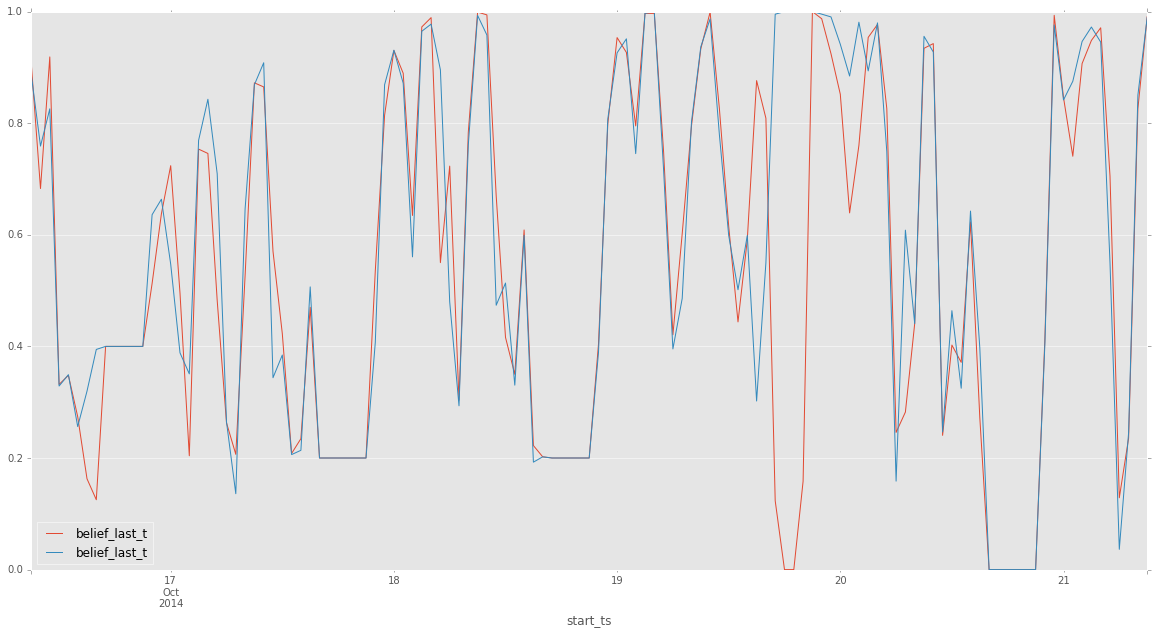

In [112]:
start = pd.to_datetime("2014-10-16 9:30:00")
end = pd.to_datetime("2014-10-21 9:30:00")
delta = pd.Timedelta('2 seconds')
plt.figure(2)
ax = plt.subplot(111)
for i, df in enumerate(df_list_2320[0:2]):
    df = df.loc[start:end]
    step = (df.index-df.index[0])/delta+1
    ts = df.belief_last_t.resample('60Min')
#     ts = df.score_model_diff.resample('60Min')
#     ts = df['total_reward'].resample('10Min')
#     ts = df['total_reward'].cumsum()/step
#     ts.index = pd.Index(step)
#     ts.name = ts_name[i]
    ts.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logx=True,
#             style=styles[i], 
#            ylim=(-1, -0.4),
           )

---

# PhiQNN

1. Phi compare 5, 10, 20, 30, 50, 100. Best \phi seems to lie somewhere btw. 10 and 30
1. range compare 10, 50. range 10 is alright
1. batchnorm does not help

In [16]:
# msg_QNN_Jan25_1710_x12 (12), Phi=5
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -0.48701, std 0.00655 10% -0.49788, 50% -0.49774, 90% -0.49760


In [19]:
# msg_QNN_Jan25_2319_x24 (24), Phi=10
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -0.48564, std 0.00769 10% -0.49626, 50% -0.49625, 90% -0.49624


In [51]:
# msg_QNN_Jan31_1154_x10 (10), Phi=15
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -0.48297, std 0.00419 10% -0.48721, 50% -0.48721, 90% -0.48721


In [21]:
# msg_QNN_Jan28_1422_x18 (18), Phi=20
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -0.48467, std 0.00620 10% -0.49530, 50% -0.49512, 90% -0.49495


In [60]:
# msg_QNN_Jan31_1156_x10 (10), Phi=25
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -0.49289, std 0.00862 10% -0.51453, 50% -0.51393, 90% -0.51333


In [24]:
# msg_QNN_Jan28_2111_x24 (23), Phi=30
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()), 
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -0.51299, std 0.01038 10% -0.53679, 50% -0.53621, 90% -0.53563


In [26]:
# msg_QNN_Jan28_2053_x18 (18), Phi=50
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -0.51491, std 0.01760 10% -0.56673, 50% -0.56453, 90% -0.56233


In [28]:
# msg_QNN_Jan28_2056_x18 (18), Phi=100
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -0.54002, std 0.01968 10% -0.59271, 50% -0.59084, 90% -0.58898


In [30]:
# msg_QNN_Jan29_1221_x6 (6), range=50
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()), 
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -0.58498, std 0.01038 10% -0.59621, 50% -0.59615, 90% -0.59609


In [10]:
# msg_QNN_Jan31_2240_x14 (), bn, phi=15
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()), 
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -0.67461, std 0.04891 10% -0.74181, 50% -0.74148, 90% -0.74115


In [16]:
# msg_QNN_Jan31_2249_LSTM_x14 (14), Phi=15, LSTM
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -0.48701, std 0.00655 10% -0.49788, 50% -0.49774, 90% -0.49760


# DynaQNN

1. n_belief_bins = 5, 100, \infty. [Larger the better]
2. n_run = 0, 1, 5, 7, 10. [5 is best]
3. range = 1, 10. [10 is better]

In [32]:
# DyanQNN_Jan25_2320_x24, n_belief=5
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -0.48893, std 0.00617 10% -0.50229, 50% -0.50186, 90% -0.50142


In [34]:
# DynaQNN_Jan28_2058_x10 (8), n_belief=100
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()), 
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -0.48151, std 0.00826 10% -0.49894, 50% -0.49861, 90% -0.49829


In [36]:
# DyanQNN_Jan26_1810_x18 (8), n_belief=\infty
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()), 
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -0.48514, std 0.00640 10% -0.49552, 50% -0.49540, 90% -0.49529


In [38]:
# DynaQNN_Jan30_2313_x14(12), n_run=7
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -0.47851, std 0.00706 10% -0.49335, 50% -0.49319, 90% -0.49303


In [40]:
# DynaQNN_Jan30_1454_x14(13), n_run=5
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -0.47175, std 0.00470 10% -0.48256, 50% -0.48231, 90% -0.48206


In [43]:
# DyanQNN_Jan30_0950_x14 (14), n_run=1
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -0.49479, std 0.00385 10% -0.50082, 50% -0.50081, 90% -0.50081


In [48]:
# DyanQNN_Jan29_2129_x24 (22), n_run=0
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()), 
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -0.52066, std 0.01326 10% -0.56191, 50% -0.56005, 90% -0.55819


In [46]:
# DyanQNN_Jan30_2305_x14 (14), n_run=5, range=1
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -0.48711, std 0.00770 10% -0.49807, 50% -0.49803, 90% -0.49798


# DynaQtable

In [5]:
# DyanQtable_Jan31_2000_x14 (14), n_run=5, n_bin=10
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -0.69051, std 0.00761 10% -0.70736, 50% -0.70701, 90% -0.70665


In [62]:
# DyanQtable_Jan31_1539_x14 (14), n_run=5, n_bin = 100
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -0.75289, std 0.01049 10% -0.77052, 50% -0.77025, 90% -0.76998
